In [131]:
import numpy as np 
import plotly.express as px
import seaborn as sns
import pandas as pd

In [132]:
df = pd.read_csv('customer_price_sensitivity_data (1).csv')

In [133]:
df

,customer_id,customer_segment,region,product_category,sales_channel,price_before,price_after,discount_applied,purchase_quantity_before,purchase_quantity_after,total_spend_before,total_spend_after,price_change_reason,repeat_purchase_flag,record_date
0,CUST100000,Unknown,South,Beauty,Offline,1790,1590,NaN,3,NaN,3580,3180,Supplier Cost,No,NaN
1,CUST100001,Mid Value,North,Beauty,Offline,2352,2352,10%,3,0.0,7056,0,Inflation,Yes,NaN
2,CUST100002,Unknown,Central,Beauty,Offline,2134,2234,20%,2,2.0,4268,6702,NaN,No,2026-02-01
3,CUST100003,Premium,Central,Electronics,Offline,3103,3203,10%,3,1.0,3103,9609,Supplier Cost,No,NaN
4,CUST100004,Budget,Central,Grocery,Mobile App,2483,2283,10%,4,0.0,4966,0,Supplier Cost,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUST199995,Mid Value,West,Electronics,Offline,4699,4599,20%,3,1.0,9398,9198,Promotion,Yes,20/11/2025
99996,CUST199996,Budget,East,Grocery,Mobile App,1699,1599,five percent,4,1.0,5097,0,Inflation,Yes,17/05/2025
99997,CUST199997,Mid Value,Central,Fashion,Offline,2782,2882,five percent,2,1.0,5564,8646,Inflation,No,2026-02-01
99998,CUST199998,Budget,North,Fashion,Mobile App,3242,3342,10%,1,0.0,9726,3342,Promotion,Yes,20/08/2025


In [134]:
df.shape

(100000, 15)

In [135]:
df.head()

,customer_id,customer_segment,region,product_category,sales_channel,price_before,price_after,discount_applied,purchase_quantity_before,purchase_quantity_after,total_spend_before,total_spend_after,price_change_reason,repeat_purchase_flag,record_date
0,CUST100000,Unknown,South,Beauty,Offline,1790,1590,NaN,3,NaN,3580,3180,Supplier Cost,No,NaN
1,CUST100001,Mid Value,North,Beauty,Offline,2352,2352,10%,3,0.0,7056,0,Inflation,Yes,NaN
2,CUST100002,Unknown,Central,Beauty,Offline,2134,2234,20%,2,2.0,4268,6702,NaN,No,2026-02-01
3,CUST100003,Premium,Central,Electronics,Offline,3103,3203,10%,3,1.0,3103,9609,Supplier Cost,No,NaN
4,CUST100004,Budget,Central,Grocery,Mobile App,2483,2283,10%,4,0.0,4966,0,Supplier Cost,No,NaN


In [136]:
df.isnull().sum()

customer_id                     0
customer_segment                0
region                          0
product_category                0
sales_channel                   0
price_before                    0
price_after                     0
discount_applied            24995
purchase_quantity_before        0
purchase_quantity_after     20175
total_spend_before              0
total_spend_after               0
price_change_reason         24847
repeat_purchase_flag            0
record_date                 33341
dtype: int64

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   customer_id               100000 non-null  object 
 1   customer_segment          100000 non-null  object 
 2   region                    100000 non-null  object 
 3   product_category          100000 non-null  object 
 4   sales_channel             100000 non-null  object 
 5   price_before              100000 non-null  int64  
 6   price_after               100000 non-null  int64  
 7   discount_applied          75005 non-null   object 
 8   purchase_quantity_before  100000 non-null  object 
 9   purchase_quantity_after   79825 non-null   float64
 10  total_spend_before        100000 non-null  int64  
 11  total_spend_after         100000 non-null  int64  
 12  price_change_reason       75153 non-null   object 
 13  repeat_purchase_flag      100000 non-null  ob

 # Data Cleaning

In [138]:
df['customer_id'].isnull().sum()

np.int64(0)

In [139]:
df = df.dropna(subset=['discount_applied'])

In [140]:
df.head()

,customer_id,customer_segment,region,product_category,sales_channel,price_before,price_after,discount_applied,purchase_quantity_before,purchase_quantity_after,total_spend_before,total_spend_after,price_change_reason,repeat_purchase_flag,record_date
1,CUST100001,Mid Value,North,Beauty,Offline,2352,2352,10%,3,0.0,7056,0,Inflation,Yes,NaN
2,CUST100002,Unknown,Central,Beauty,Offline,2134,2234,20%,2,2.0,4268,6702,NaN,No,2026-02-01
3,CUST100003,Premium,Central,Electronics,Offline,3103,3203,10%,3,1.0,3103,9609,Supplier Cost,No,NaN
4,CUST100004,Budget,Central,Grocery,Mobile App,2483,2283,10%,4,0.0,4966,0,Supplier Cost,No,NaN
5,CUST100005,Budget,South,Home,Offline,2479,3179,five percent,3,3.0,4958,3179,NaN,Yes,2026-02-01


In [141]:
df['discount_applied'] = df['discount_applied'].str.extract('(\d+)')
df['discount_applied'] = pd.to_numeric(df['discount_applied'])
df = df.dropna(subset=['discount_applied'])

C:\Users\md salman\AppData\Local\Temp\ipykernel_18108\2056671916.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\md salman\AppData\Local\Temp\ipykernel_18108\2056671916.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [142]:
df.head()

,customer_id,customer_segment,region,product_category,sales_channel,price_before,price_after,discount_applied,purchase_quantity_before,purchase_quantity_after,total_spend_before,total_spend_after,price_change_reason,repeat_purchase_flag,record_date
1,CUST100001,Mid Value,North,Beauty,Offline,2352,2352,10.0,3,0.0,7056,0,Inflation,Yes,NaN
2,CUST100002,Unknown,Central,Beauty,Offline,2134,2234,20.0,2,2.0,4268,6702,NaN,No,2026-02-01
3,CUST100003,Premium,Central,Electronics,Offline,3103,3203,10.0,3,1.0,3103,9609,Supplier Cost,No,NaN
4,CUST100004,Budget,Central,Grocery,Mobile App,2483,2283,10.0,4,0.0,4966,0,Supplier Cost,No,NaN
7,CUST100007,Mid Value,Central,Home,Online,749,649,20.0,4,2.0,749,1298,Promotion,No,02/02/2025


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49964 entries, 1 to 99998
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               49964 non-null  object 
 1   customer_segment          49964 non-null  object 
 2   region                    49964 non-null  object 
 3   product_category          49964 non-null  object 
 4   sales_channel             49964 non-null  object 
 5   price_before              49964 non-null  int64  
 6   price_after               49964 non-null  int64  
 7   discount_applied          49964 non-null  float64
 8   purchase_quantity_before  49964 non-null  object 
 9   purchase_quantity_after   39743 non-null  float64
 10  total_spend_before        49964 non-null  int64  
 11  total_spend_after         49964 non-null  int64  
 12  price_change_reason       37412 non-null  object 
 13  repeat_purchase_flag      49964 non-null  object 
 14  record_date

In [144]:
df['purchase_quantity_before'].isnull().sum()

np.int64(0)

In [145]:
df['purchase_quantity_before'] = pd.to_numeric(df['purchase_quantity_before'],errors='coerce')

In [146]:
df.head()

,customer_id,customer_segment,region,product_category,sales_channel,price_before,price_after,discount_applied,purchase_quantity_before,purchase_quantity_after,total_spend_before,total_spend_after,price_change_reason,repeat_purchase_flag,record_date
1,CUST100001,Mid Value,North,Beauty,Offline,2352,2352,10.0,3.0,0.0,7056,0,Inflation,Yes,NaN
2,CUST100002,Unknown,Central,Beauty,Offline,2134,2234,20.0,2.0,2.0,4268,6702,NaN,No,2026-02-01
3,CUST100003,Premium,Central,Electronics,Offline,3103,3203,10.0,3.0,1.0,3103,9609,Supplier Cost,No,NaN
4,CUST100004,Budget,Central,Grocery,Mobile App,2483,2283,10.0,4.0,0.0,4966,0,Supplier Cost,No,NaN
7,CUST100007,Mid Value,Central,Home,Online,749,649,20.0,4.0,2.0,749,1298,Promotion,No,02/02/2025


In [147]:
print(df['purchase_quantity_after'].dtype)

float64


In [148]:
df = df.dropna(subset=['purchase_quantity_after'])

In [149]:
df.head()

,customer_id,customer_segment,region,product_category,sales_channel,price_before,price_after,discount_applied,purchase_quantity_before,purchase_quantity_after,total_spend_before,total_spend_after,price_change_reason,repeat_purchase_flag,record_date
1,CUST100001,Mid Value,North,Beauty,Offline,2352,2352,10.0,3.0,0.0,7056,0,Inflation,Yes,NaN
2,CUST100002,Unknown,Central,Beauty,Offline,2134,2234,20.0,2.0,2.0,4268,6702,NaN,No,2026-02-01
3,CUST100003,Premium,Central,Electronics,Offline,3103,3203,10.0,3.0,1.0,3103,9609,Supplier Cost,No,NaN
4,CUST100004,Budget,Central,Grocery,Mobile App,2483,2283,10.0,4.0,0.0,4966,0,Supplier Cost,No,NaN
7,CUST100007,Mid Value,Central,Home,Online,749,649,20.0,4.0,2.0,749,1298,Promotion,No,02/02/2025


In [150]:
df.isnull().sum()

customer_id                     0
customer_segment                0
region                          0
product_category                0
sales_channel                   0
price_before                    0
price_after                     0
discount_applied                0
purchase_quantity_before     7835
purchase_quantity_after         0
total_spend_before              0
total_spend_after               0
price_change_reason          9966
repeat_purchase_flag            0
record_date                 13195
dtype: int64

In [151]:
df = df.dropna(subset=['purchase_quantity_before'])

In [152]:
df['purchase_quantity_before'] = df['purchase_quantity_before'].fillna(0)

In [153]:
df.head()

,customer_id,customer_segment,region,product_category,sales_channel,price_before,price_after,discount_applied,purchase_quantity_before,purchase_quantity_after,total_spend_before,total_spend_after,price_change_reason,repeat_purchase_flag,record_date
1,CUST100001,Mid Value,North,Beauty,Offline,2352,2352,10.0,3.0,0.0,7056,0,Inflation,Yes,NaN
2,CUST100002,Unknown,Central,Beauty,Offline,2134,2234,20.0,2.0,2.0,4268,6702,NaN,No,2026-02-01
3,CUST100003,Premium,Central,Electronics,Offline,3103,3203,10.0,3.0,1.0,3103,9609,Supplier Cost,No,NaN
4,CUST100004,Budget,Central,Grocery,Mobile App,2483,2283,10.0,4.0,0.0,4966,0,Supplier Cost,No,NaN
7,CUST100007,Mid Value,Central,Home,Online,749,649,20.0,4.0,2.0,749,1298,Promotion,No,02/02/2025


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31908 entries, 1 to 99998
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31908 non-null  object 
 1   customer_segment          31908 non-null  object 
 2   region                    31908 non-null  object 
 3   product_category          31908 non-null  object 
 4   sales_channel             31908 non-null  object 
 5   price_before              31908 non-null  int64  
 6   price_after               31908 non-null  int64  
 7   discount_applied          31908 non-null  float64
 8   purchase_quantity_before  31908 non-null  float64
 9   purchase_quantity_after   31908 non-null  float64
 10  total_spend_before        31908 non-null  int64  
 11  total_spend_after         31908 non-null  int64  
 12  price_change_reason       23963 non-null  object 
 13  repeat_purchase_flag      31908 non-null  object 
 14  record_date

In [155]:
df  = df.dropna(subset=['price_change_reason'])


In [156]:
df.head()

,customer_id,customer_segment,region,product_category,sales_channel,price_before,price_after,discount_applied,purchase_quantity_before,purchase_quantity_after,total_spend_before,total_spend_after,price_change_reason,repeat_purchase_flag,record_date
1,CUST100001,Mid Value,North,Beauty,Offline,2352,2352,10.0,3.0,0.0,7056,0,Inflation,Yes,NaN
3,CUST100003,Premium,Central,Electronics,Offline,3103,3203,10.0,3.0,1.0,3103,9609,Supplier Cost,No,NaN
4,CUST100004,Budget,Central,Grocery,Mobile App,2483,2283,10.0,4.0,0.0,4966,0,Supplier Cost,No,NaN
7,CUST100007,Mid Value,Central,Home,Online,749,649,20.0,4.0,2.0,749,1298,Promotion,No,02/02/2025
8,CUST100008,Budget,North,Fashion,Mobile App,1433,1233,10.0,1.0,2.0,1433,0,Promotion,Yes,2026-02-01


In [157]:
df['repeat_purchase_flag'].unique()

array(['Yes', 'No'], dtype=object)

In [158]:
df.head()

,customer_id,customer_segment,region,product_category,sales_channel,price_before,price_after,discount_applied,purchase_quantity_before,purchase_quantity_after,total_spend_before,total_spend_after,price_change_reason,repeat_purchase_flag,record_date
1,CUST100001,Mid Value,North,Beauty,Offline,2352,2352,10.0,3.0,0.0,7056,0,Inflation,Yes,NaN
3,CUST100003,Premium,Central,Electronics,Offline,3103,3203,10.0,3.0,1.0,3103,9609,Supplier Cost,No,NaN
4,CUST100004,Budget,Central,Grocery,Mobile App,2483,2283,10.0,4.0,0.0,4966,0,Supplier Cost,No,NaN
7,CUST100007,Mid Value,Central,Home,Online,749,649,20.0,4.0,2.0,749,1298,Promotion,No,02/02/2025
8,CUST100008,Budget,North,Fashion,Mobile App,1433,1233,10.0,1.0,2.0,1433,0,Promotion,Yes,2026-02-01


In [160]:
df['record_date'] = pd.to_datetime(df['record_date'], errors='coerce')


In [161]:
df.head()

,customer_id,customer_segment,region,product_category,sales_channel,price_before,price_after,discount_applied,purchase_quantity_before,purchase_quantity_after,total_spend_before,total_spend_after,price_change_reason,repeat_purchase_flag,record_date
1,CUST100001,Mid Value,North,Beauty,Offline,2352,2352,10.0,3.0,0.0,7056,0,Inflation,Yes,NaT
3,CUST100003,Premium,Central,Electronics,Offline,3103,3203,10.0,3.0,1.0,3103,9609,Supplier Cost,No,NaT
4,CUST100004,Budget,Central,Grocery,Mobile App,2483,2283,10.0,4.0,0.0,4966,0,Supplier Cost,No,NaT
7,CUST100007,Mid Value,Central,Home,Online,749,649,20.0,4.0,2.0,749,1298,Promotion,No,2025-02-02
8,CUST100008,Budget,North,Fashion,Mobile App,1433,1233,10.0,1.0,2.0,1433,0,Promotion,Yes,NaT


In [162]:
df['record_date'].isna().sum()


np.int64(20800)

In [163]:
df = df.dropna(subset=['record_date'])


In [164]:
df.head()

,customer_id,customer_segment,region,product_category,sales_channel,price_before,price_after,discount_applied,purchase_quantity_before,purchase_quantity_after,total_spend_before,total_spend_after,price_change_reason,repeat_purchase_flag,record_date
7,CUST100007,Mid Value,Central,Home,Online,749,649,20.0,4.0,2.0,749,1298,Promotion,No,2025-02-02
13,CUST100013,Unknown,South,Grocery,Mobile App,2509,2309,20.0,1.0,0.0,2509,4618,Supplier Cost,Yes,2025-09-12
39,CUST100039,Mid Value,South,Grocery,Offline,4369,4669,20.0,4.0,2.0,13107,4669,Inflation,Yes,2025-01-10
51,CUST100051,Premium,East,Grocery,Mobile App,3130,3030,10.0,3.0,0.0,6260,9090,Supplier Cost,Yes,2026-08-01
91,CUST100091,Mid Value,Central,Home,Offline,4162,4162,10.0,1.0,2.0,4162,8324,Inflation,Yes,2025-11-01


# Visualization

In [165]:
df.head()

,customer_id,customer_segment,region,product_category,sales_channel,price_before,price_after,discount_applied,purchase_quantity_before,purchase_quantity_after,total_spend_before,total_spend_after,price_change_reason,repeat_purchase_flag,record_date
7,CUST100007,Mid Value,Central,Home,Online,749,649,20.0,4.0,2.0,749,1298,Promotion,No,2025-02-02
13,CUST100013,Unknown,South,Grocery,Mobile App,2509,2309,20.0,1.0,0.0,2509,4618,Supplier Cost,Yes,2025-09-12
39,CUST100039,Mid Value,South,Grocery,Offline,4369,4669,20.0,4.0,2.0,13107,4669,Inflation,Yes,2025-01-10
51,CUST100051,Premium,East,Grocery,Mobile App,3130,3030,10.0,3.0,0.0,6260,9090,Supplier Cost,Yes,2026-08-01
91,CUST100091,Mid Value,Central,Home,Offline,4162,4162,10.0,1.0,2.0,4162,8324,Inflation,Yes,2025-11-01


# Which sales channel has the highest customer traffic?"

In [202]:
saless = df['sales_channel'].value_counts().reset_index()
saless.columns = ['sales_channel','count']

In [203]:
saless

,sales_channel,count
0,Online,1121
1,Offline,1051
2,Mobile App,991


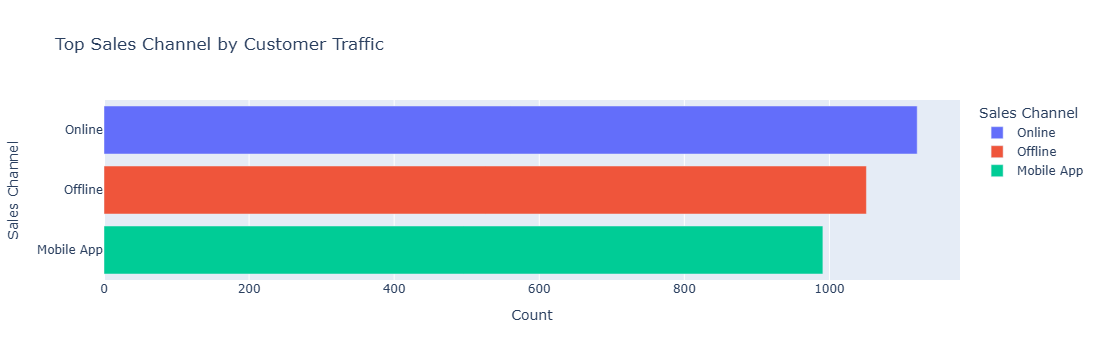

In [206]:
fig = px.bar(
    saless,
    x='count',
    y='sales_channel',
    color='sales_channel',
    title='Top Sales Channel by Customer Traffic',
    labels={'sales_channel':'Sales Channel','count':'Count'}
)
fig.show()

In [207]:
df.head()

,customer_id,customer_segment,region,product_category,sales_channel,price_before,price_after,discount_applied,purchase_quantity_before,purchase_quantity_after,total_spend_before,total_spend_after,price_change_reason,repeat_purchase_flag,record_date
7,CUST100007,Mid Value,Central,Home,Online,749,649,20.0,4.0,2.0,749,1298,Promotion,No,2025-02-02
13,CUST100013,Unknown,South,Grocery,Mobile App,2509,2309,20.0,1.0,0.0,2509,4618,Supplier Cost,Yes,2025-09-12
39,CUST100039,Mid Value,South,Grocery,Offline,4369,4669,20.0,4.0,2.0,13107,4669,Inflation,Yes,2025-01-10
51,CUST100051,Premium,East,Grocery,Mobile App,3130,3030,10.0,3.0,0.0,6260,9090,Supplier Cost,Yes,2026-08-01
91,CUST100091,Mid Value,Central,Home,Offline,4162,4162,10.0,1.0,2.0,4162,8324,Inflation,Yes,2025-11-01


# Which customer segment purchases the highest number of products

In [211]:
segment = df.groupby('customer_segment')['product_category'].value_counts().reset_index()

In [212]:
segment

,customer_segment,product_category,count
0,Budget,Beauty,175
1,Budget,Electronics,166
2,Budget,Home,161
3,Budget,Fashion,146
4,Budget,Grocery,140
5,Mid Value,Grocery,167
6,Mid Value,Beauty,157
7,Mid Value,Electronics,153
8,Mid Value,Fashion,150
9,Mid Value,Home,149


In [213]:
df[df['customer_segment'] != 'Unknown']

,customer_id,customer_segment,region,product_category,sales_channel,price_before,price_after,discount_applied,purchase_quantity_before,purchase_quantity_after,total_spend_before,total_spend_after,price_change_reason,repeat_purchase_flag,record_date
7,CUST100007,Mid Value,Central,Home,Online,749,649,20.0,4.0,2.0,749,1298,Promotion,No,2025-02-02
39,CUST100039,Mid Value,South,Grocery,Offline,4369,4669,20.0,4.0,2.0,13107,4669,Inflation,Yes,2025-01-10
51,CUST100051,Premium,East,Grocery,Mobile App,3130,3030,10.0,3.0,0.0,6260,9090,Supplier Cost,Yes,2026-08-01
91,CUST100091,Mid Value,Central,Home,Offline,4162,4162,10.0,1.0,2.0,4162,8324,Inflation,Yes,2025-11-01
103,CUST100103,Mid Value,North,Electronics,Online,537,437,10.0,2.0,3.0,537,0,Supplier Cost,Yes,2025-09-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99820,CUST199820,Premium,Central,Electronics,Offline,1112,912,20.0,3.0,0.0,1112,912,Promotion,No,2025-08-09
99833,CUST199833,Budget,Central,Beauty,Mobile App,3887,4187,20.0,2.0,1.0,7774,4187,Supplier Cost,No,2026-11-01
99892,CUST199892,Mid Value,North,Electronics,Online,4009,3909,10.0,4.0,0.0,4009,11727,Inflation,No,2025-03-05
99933,CUST199933,Premium,North,Grocery,Online,4864,4764,10.0,3.0,3.0,4864,14292,Inflation,No,2025-02-12


In [214]:
segment = df.groupby('customer_segment')['product_category'].value_counts().reset_index()

In [215]:
segment

,customer_segment,product_category,count
0,Budget,Beauty,175
1,Budget,Electronics,166
2,Budget,Home,161
3,Budget,Fashion,146
4,Budget,Grocery,140
5,Mid Value,Grocery,167
6,Mid Value,Beauty,157
7,Mid Value,Electronics,153
8,Mid Value,Fashion,150
9,Mid Value,Home,149


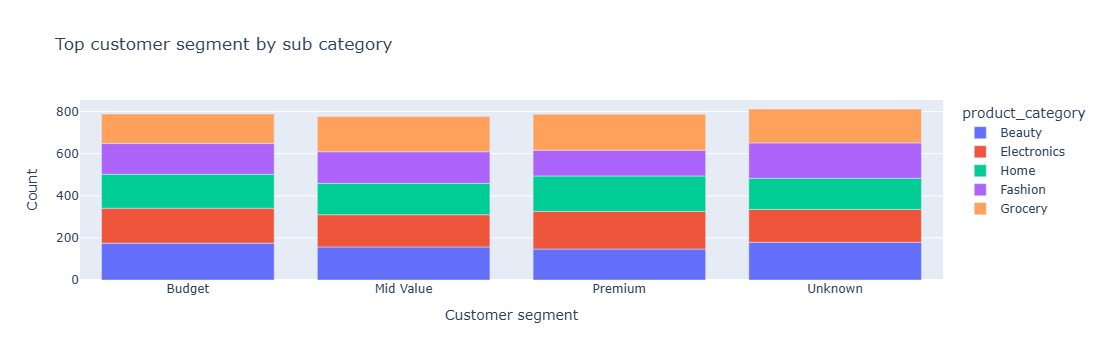

In [217]:
fig = px.bar(
    segment,
    x='customer_segment',
    y='count',
    title='Top customer segment by sub category',
    color='product_category',
    labels={'customer_segment':'Customer segment','count':'Count'}
)
fig.show()

In [218]:
df.head()

,customer_id,customer_segment,region,product_category,sales_channel,price_before,price_after,discount_applied,purchase_quantity_before,purchase_quantity_after,total_spend_before,total_spend_after,price_change_reason,repeat_purchase_flag,record_date
7,CUST100007,Mid Value,Central,Home,Online,749,649,20.0,4.0,2.0,749,1298,Promotion,No,2025-02-02
13,CUST100013,Unknown,South,Grocery,Mobile App,2509,2309,20.0,1.0,0.0,2509,4618,Supplier Cost,Yes,2025-09-12
39,CUST100039,Mid Value,South,Grocery,Offline,4369,4669,20.0,4.0,2.0,13107,4669,Inflation,Yes,2025-01-10
51,CUST100051,Premium,East,Grocery,Mobile App,3130,3030,10.0,3.0,0.0,6260,9090,Supplier Cost,Yes,2026-08-01
91,CUST100091,Mid Value,Central,Home,Offline,4162,4162,10.0,1.0,2.0,4162,8324,Inflation,Yes,2025-11-01


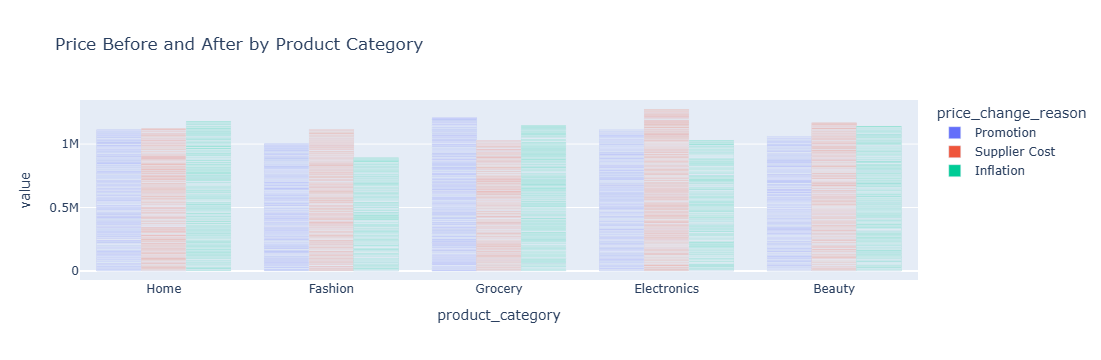

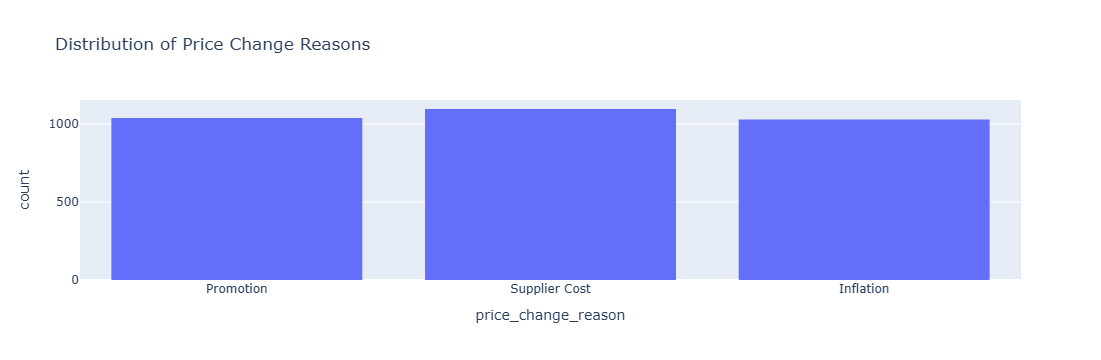

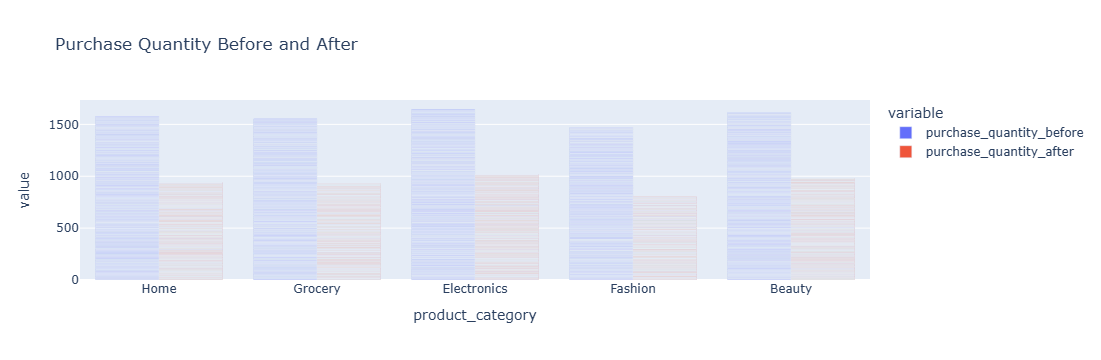

In [220]:

fig_price_change = px.bar(
    df,
    x='product_category',
    y=['price_before', 'price_after'],
    color='price_change_reason',
    barmode='group',
    title='Price Before and After by Product Category'
)


fig_reason = px.histogram(
    df,
    x='price_change_reason',
    title='Distribution of Price Change Reasons'
)

fig_quantity = px.bar(
    df,
    x='product_category',
    y=['purchase_quantity_before', 'purchase_quantity_after'],
    barmode='group',
    title='Purchase Quantity Before and After'
)
fig_price_change.show()
fig_reason.show()
fig_quantity.show()


# Which region orders the highest number of products in each category

In [222]:
hight = df.groupby('region')['product_category'].value_counts().reset_index()
hight

,region,product_category,count
0,Central,Beauty,143
1,Central,Grocery,133
2,Central,Electronics,125
3,Central,Home,111
4,Central,Fashion,108
5,East,Electronics,130
6,East,Home,127
7,East,Grocery,121
8,East,Beauty,120
9,East,Fashion,107


In [ ]:
fig = px.bar(
    hight,
    x='region',
    y='count',
    color='product_category',
    title=''
)